In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Read Data
df=pd.read_csv("diabetes.csv")


In [3]:
# data
x=df.drop("Outcome",axis=1).values

In [4]:
# outcome data
y=df['Outcome'].values

In [90]:
#แบ่งชุดข้อมูล #test_size คือส่วนของข้อมูลที่เอามา test เป็น %
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4) 

In [91]:
#เราจะสร้าง model โดยใช้ KNN โดยเราต้องระบุหาค่า K หรือจำหน่วยจุดใกล้เคียง 
#เพื่อคำนวนหาความแม่นยำของตัว model ว่าเราควรจะเลือกใช้ตัว K ที่สามารถบอกความแม่นยำของ model

# find k to model
k_neighbors=np.arange(1,9)

In [92]:
#empty
train_score = np.empty(len(k_neighbors))
test_score = np.empty(len(k_neighbors))

In [93]:
#ซึ่งวิธีหาคือทำการ train ค่าข้อมูลของเราไปที่ model โดยเราจะทดสอบค่า k ทุกค่า
for i,k in enumerate(k_neighbors):
    #1-8
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    #วัดประสิทธิภาพ
    train_score[i]=knn.score(x_train,y_train)
    test_score[i]=knn.score(x_test,y_test)
    print(test_score[i]*100)

67.20779220779221
70.45454545454545
66.88311688311688
71.1038961038961
69.48051948051948
73.37662337662337
71.42857142857143
74.02597402597402


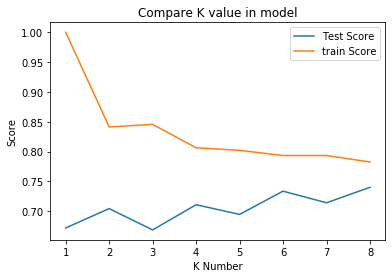

In [94]:
plt.title("Compare K value in model")
plt.plot(k_neighbors,test_score,label="Test Score")
plt.plot(k_neighbors,train_score,label="train Score")
plt.legend()
plt.xlabel("K Number")
plt.ylabel("Score")
plt.show()

In [95]:
#prediction 
knn=KNeighborsClassifier(n_neighbors=8)
#train
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)


In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       201
           1       0.66      0.52      0.58       107

    accuracy                           0.74       308
   macro avg       0.72      0.69      0.70       308
weighted avg       0.73      0.74      0.73       308



In [97]:
#ค่าความคาดเคลื่อน
print(pd.crosstab(y_test,y_pred,rownames=['Actually'],colnames=['Prediction'],margins=True))

Prediction    0   1  All
Actually                
0           172  29  201
1            51  56  107
All         223  85  308
